# Approximating the sine function with an MLP

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [1]:
# Biblioteca de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

2024-10-02 00:08:48.411496: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 00:08:48.497636: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 00:08:48.588513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 00:08:48.668001: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 00:08:48.691545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 00:08:48.846482: I tensorflow/core/platform/cpu_feature_gu

## Etapa 02
Criar a base de dados sintética.

In [2]:
NUM_SAMPLES = 500

x_train = np.random.uniform(0, 1, NUM_SAMPLES)
x_train = np.sort(x_train, axis = 0)
y_train = np.sin(2 * np.pi * x_train)

x_test = np.random.uniform(0, 1, int(NUM_SAMPLES/3))
x_test = np.sort(x_test, axis = 0)
y_test = np.sin(2 * np.pi * x_test)

## Etapa 03
Conhecer a dimensão dos conjuntos da base de dados.

In [3]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (500,)
y_train (500,)
x_test (166,)
y_test (166,)


## Etapa 04
Construir a rede neural utilizando o Keras.

In [4]:
try:
    del model
except:
    pass

np.random.seed(1)
keras.backend.clear_session(
    free_memory = True
)

model = Sequential()
model.add(Dense(64, input_dim = 1,  activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(1, activation='linear'))

model.summary()

/home/fbaltor/.pyenv/versions/3.11.10/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,729 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

## Etapa 05
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [5]:
otimizador = keras.optimizers.Adam()
model.compile(optimizer= otimizador,
              loss='mse',
              metrics=['mae'])

## Etapa 06
Treinar o modelo e realizar a validação.

Epoch 1/100
8/8 - 1s - 178ms/step - loss: 0.5080 - mae: 0.6421 - val_loss: 0.4874 - val_mae: 0.6269
Epoch 2/100
8/8 - 0s - 7ms/step - loss: 0.4608 - mae: 0.6054 - val_loss: 0.4657 - val_mae: 0.6102
Epoch 3/100
8/8 - 0s - 8ms/step - loss: 0.4423 - mae: 0.5902 - val_loss: 0.4460 - val_mae: 0.5940
Epoch 4/100
8/8 - 0s - 8ms/step - loss: 0.4226 - mae: 0.5740 - val_loss: 0.4239 - val_mae: 0.5758
Epoch 5/100
8/8 - 0s - 7ms/step - loss: 0.4018 - mae: 0.5568 - val_loss: 0.4004 - val_mae: 0.5566
Epoch 6/100
8/8 - 0s - 7ms/step - loss: 0.3781 - mae: 0.5383 - val_loss: 0.3733 - val_mae: 0.5339
Epoch 7/100
8/8 - 0s - 7ms/step - loss: 0.3526 - mae: 0.5187 - val_loss: 0.3441 - val_mae: 0.5082
Epoch 8/100
8/8 - 0s - 7ms/step - loss: 0.3266 - mae: 0.4970 - val_loss: 0.3155 - val_mae: 0.4828
Epoch 9/100
8/8 - 0s - 7ms/step - loss: 0.3017 - mae: 0.4753 - val_loss: 0.2884 - val_mae: 0.4601
Epoch 10/100
8/8 - 0s - 10ms/step - loss: 0.2782 - mae: 0.4555 - val_loss: 0.2636 - val_mae: 0.4374
Epoch 11/100
8/8

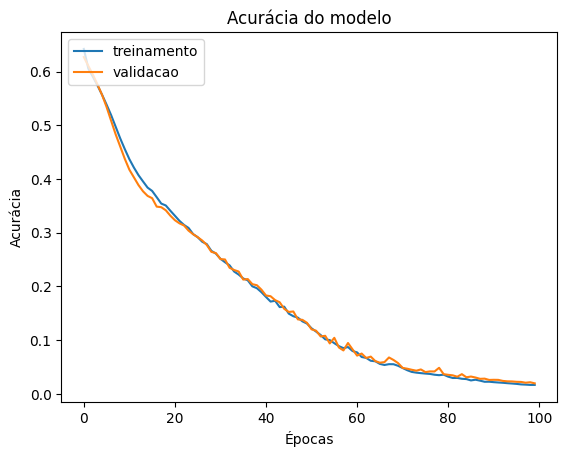

In [6]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(x_test, y_test))
plt.plot(history.history['mae'], label = 'treinamento')
plt.plot(history.history['val_mae'], label='validacao')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['treinamento', 'validacao'], loc='upper left')
plt.show()

## Etapa 07
Realizar algumas predições.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


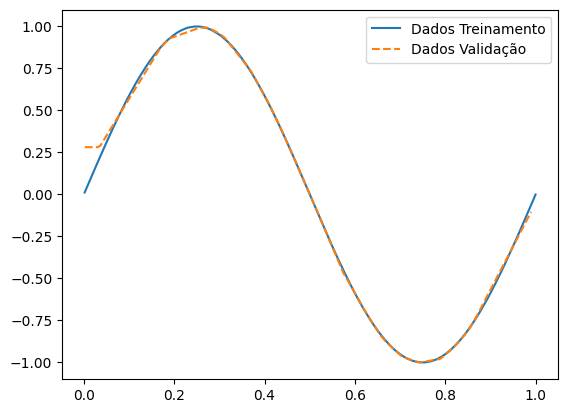

In [9]:
y_pred = model.predict(x_test)

plt.plot(x_train, y_train, '-', label='Dados Treinamento')
plt.plot(x_test, y_pred, '--', label='Dados Validação')
plt.legend()

In [10]:
model.evaluate(x_train, y_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - mae: 0.0327 


[0.0016100568464025855, 0.015384125523269176]